<a id="1"></a>
# <p style="padding:10px;background-color:#A3FFD6;margin:0;color:#000000;font-family:courier;font-size:100%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:bold">Customer Segmentation for marketing analysis</p>

<p style="text-align:center; ">
<img src="D:\artificial intelligence\ML\customer_segmentation _mage.png".png" style='width: 650px; height: 350px;'>
</p>

In [1]:
import kaggle
! kaggle datasets download -d fahmidachowdhury/customer-segmentation-data-for-marketing-analysis

Dataset URL: https://www.kaggle.com/datasets/fahmidachowdhury/customer-segmentation-data-for-marketing-analysis
License(s): CC0-1.0




  0%|          | 0.00/16.4k [00:00<?, ?B/s]
100%|██████████| 16.4k/16.4k [00:00<00:00, 303kB/s]


<h2 style="padding:10px;background-color:#A3FFD6;color:#000000;font-family:courier;font-size:100%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:bold;">
  Steps for Segmentation
</h2>

<ul style="list-style: disc inside;padding:10px;background-color:#A3FFD6;color:#000000;font-family:courier;font-size:100%;text-align:left;border-radius: 10px 0px;overflow:hidden;font-weight:1000;">
  <li style="padding:10px;margin:10px 0;">Importing Libraries</li>
  <li style="padding:10px;margin:10px 0;">Explore the data</li>
  <li style="padding:10px;margin:10px 0;">Exploratory data analysis</li>
  <li style="padding:10px;margin:10px 0;">Feature Engineering</li>
  <li style="padding:10px;margin:10px 0;">Training</li>
  <li style="padding:10px;margin:10px 0;">Segmentating clusters based on clusters</li>
</ul>


<a id="1"></a>
# <p style="padding:10px;background-color:#A3FFD6;margin:0;color:#000000;font-family:courier;font-size:100%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:bold">Importing Libraries</p>

In [2]:
import zipfile as zp 
ref = zp.ZipFile('customer-segmentation-data-for-marketing-analysis.zip')
ref.extractall()
ref.close()

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster  import KMeans
from sklearn.preprocessing import LabelEncoder
from yellowbrick.cluster import KElbowVisualizer
import warnings
warnings.filterwarnings("ignore")

<a id="1"></a>
# <p style="padding:10px;background-color:#A3FFD6;margin:0;color:#000000;font-family:courier;font-size:100%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:bold">Explore the data</p>

In [4]:
df = pd.read_csv('customer_segmentation_data.csv')
df

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08
...,...,...,...,...,...,...,...,...,...
995,996,57,Male,112170,57,6,1,Clothing,313.64
996,997,23,Other,65337,76,10,23,Groceries,632.83
997,998,23,Male,113097,40,5,42,Sports,75.09
998,999,22,Female,113695,63,7,44,Electronics,505.16


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   age                   1000 non-null   int64  
 2   gender                1000 non-null   object 
 3   income                1000 non-null   int64  
 4   spending_score        1000 non-null   int64  
 5   membership_years      1000 non-null   int64  
 6   purchase_frequency    1000 non-null   int64  
 7   preferred_category    1000 non-null   object 
 8   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 70.4+ KB


In [6]:
columns = df.columns

In [7]:
numeric_cols = [cols for cols in columns if df[cols].dtype in ['int64', 'float64']]
cat_cols = [cols for cols in columns if df[cols].dtype == 'object']

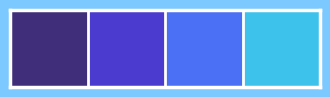

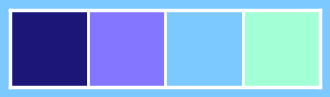

In [8]:
sns.set_style("dark")
sns.set(rc={"axes.facecolor":"#A3FFD6","figure.facecolor":"#7BC9FF"})
sns.set_context("poster",font_scale = .7)

palette = ['#402E7A','#4C3BCF','#4B70F5','#3DC2EC']
cluster_palette = ['#1C1678','#8576FF','#7BC9FF','#A3FFD6']
sns.palplot(sns.color_palette(palette))
sns.palplot(sns.color_palette(cluster_palette))


<a id="1"></a>
# <p style="padding:10px;background-color:#A3FFD6;margin:0;color:#000000;font-family:courier;font-size:100%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:bold">Exploratory data analysis</p>

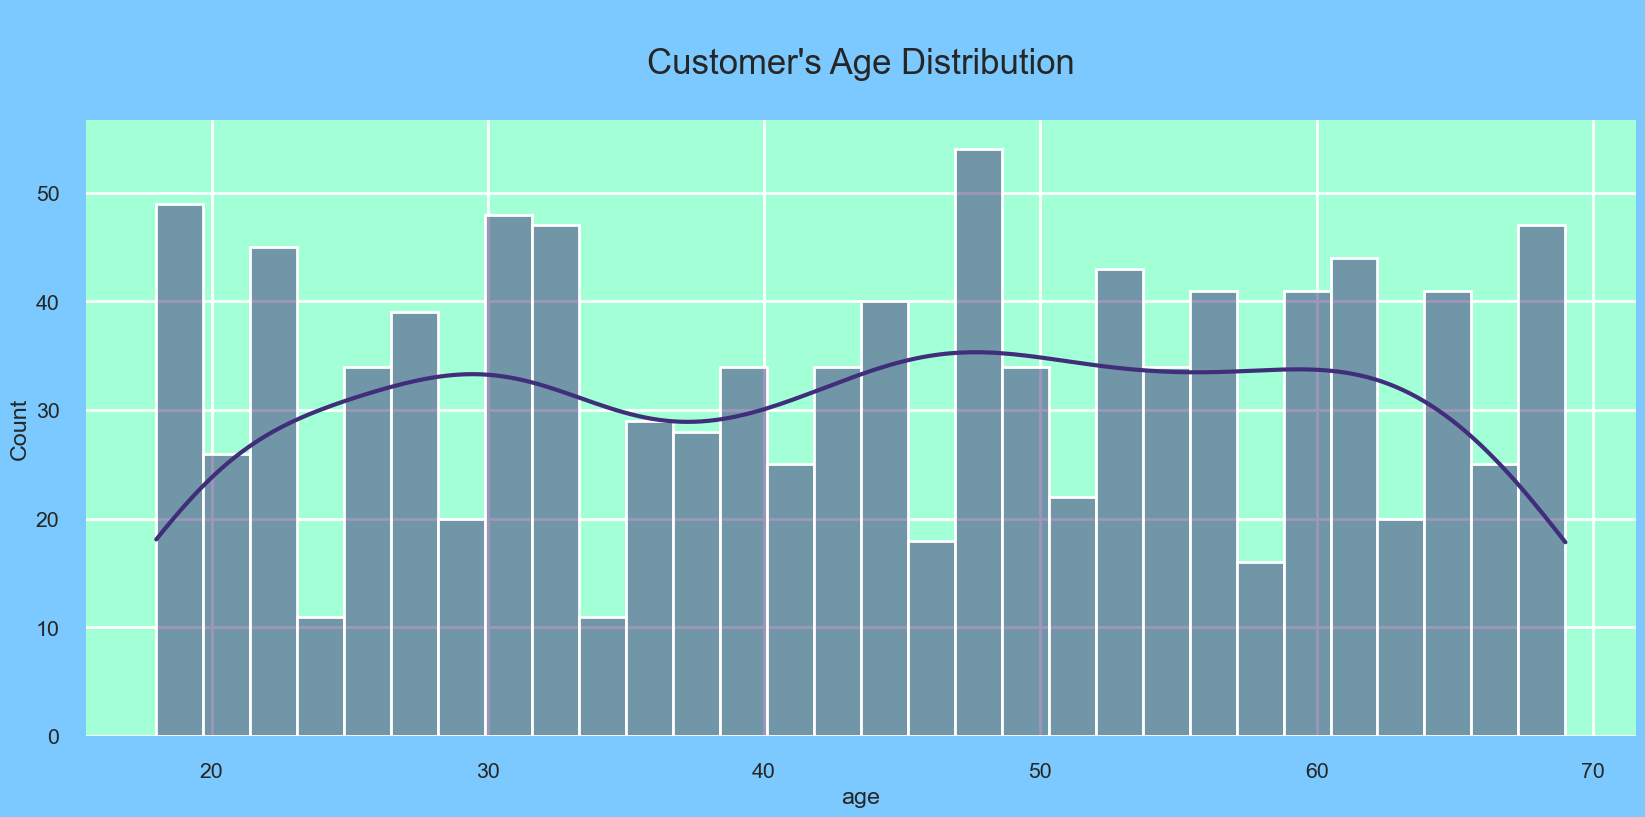

In [9]:
plt.figure(figsize=(20, 8))
p = sns.histplot(df['age'], color='#402E7A', kde=True, edgecolor='white', bins=30, alpha=0.5, fill=True)
p.axes.lines[0].set_color(palette[0])
p.axes.set_title("\nCustomer's Age Distribution\n",fontsize=25)
sns.despine(left=True, bottom=True)
plt.show()

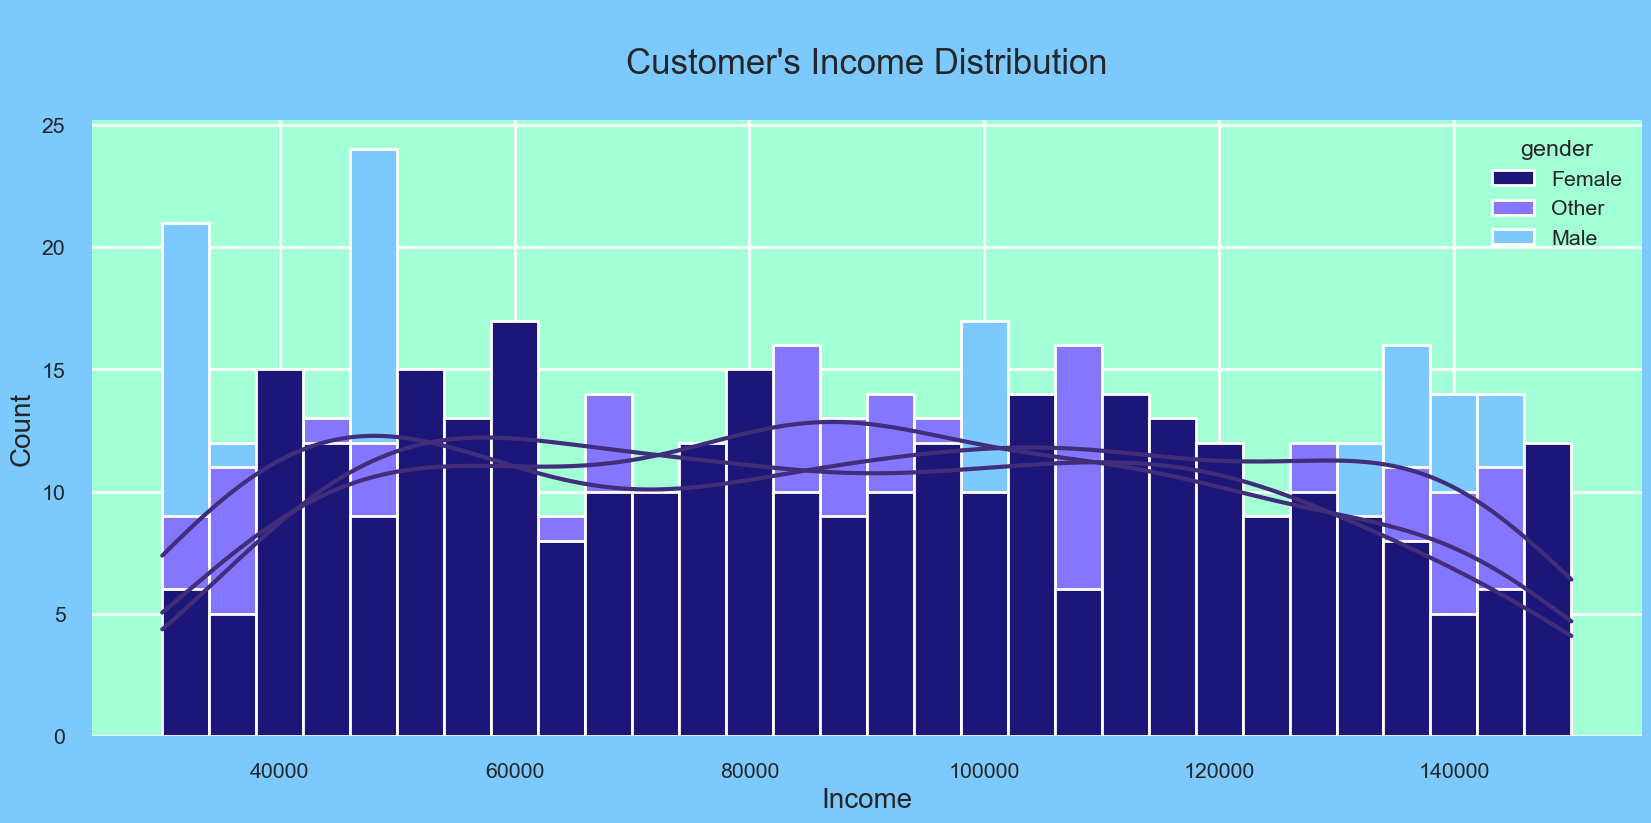

In [10]:
plt.figure(figsize=(20, 8))
p = sns.histplot(data=df, x='income', palette=['#1C1678','#8576FF','#7BC9FF'], kde=True, edgecolor='white', bins=30, alpha=1, fill=True, hue= 'gender')
p.axes.lines[0].set_color(palette[0])
p.axes.lines[1].set_color(palette[0])
p.axes.lines[2].set_color(palette[0])
p.axes.set_title("\nCustomer's Income Distribution\n",fontsize=25)
plt.xlabel('Income', fontsize=20)
plt.ylabel('Count', fontsize=20)
sns.despine(left=True, bottom=True)
plt.show()

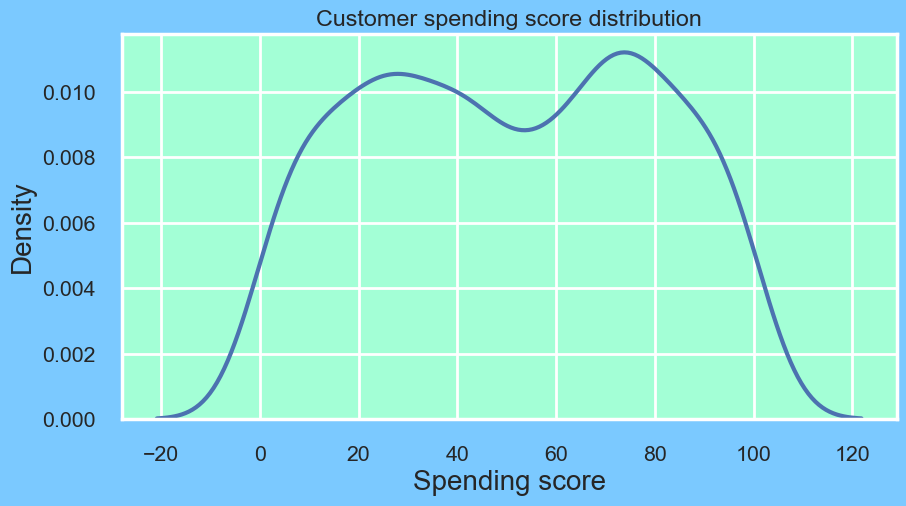

In [11]:
plt.figure(figsize=(10, 5))
sns.kdeplot(df['spending_score'])
plt.title('Customer spending score distribution')
plt.xlabel('Spending score',  fontsize = 20)
plt.ylabel('Density', fontsize= 20)
plt.show()

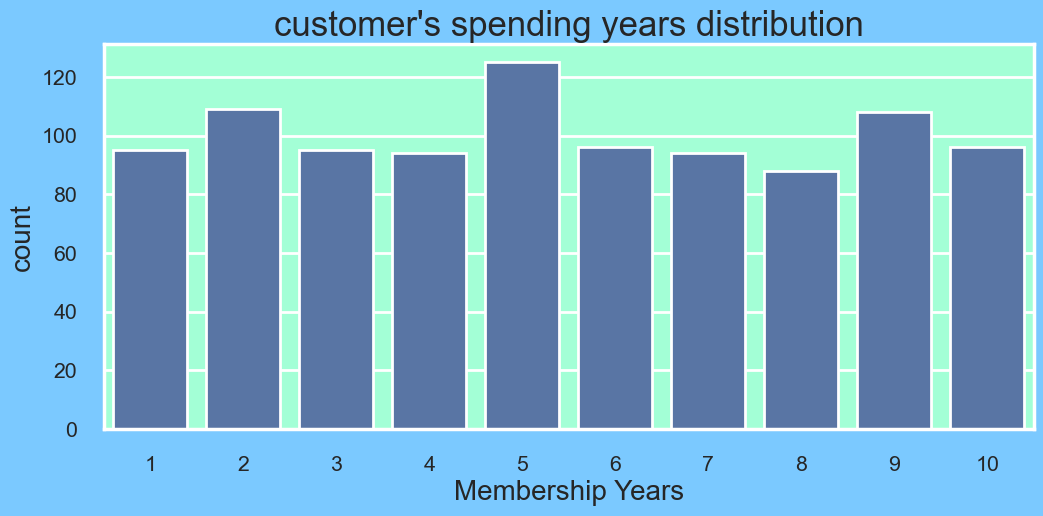

In [12]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='membership_years')
plt.title('customer\'s spending years distribution', fontsize= 25)
plt.xlabel("Membership Years", fontsize= 20)
plt.ylabel('count', fontsize= 20)
plt.show()


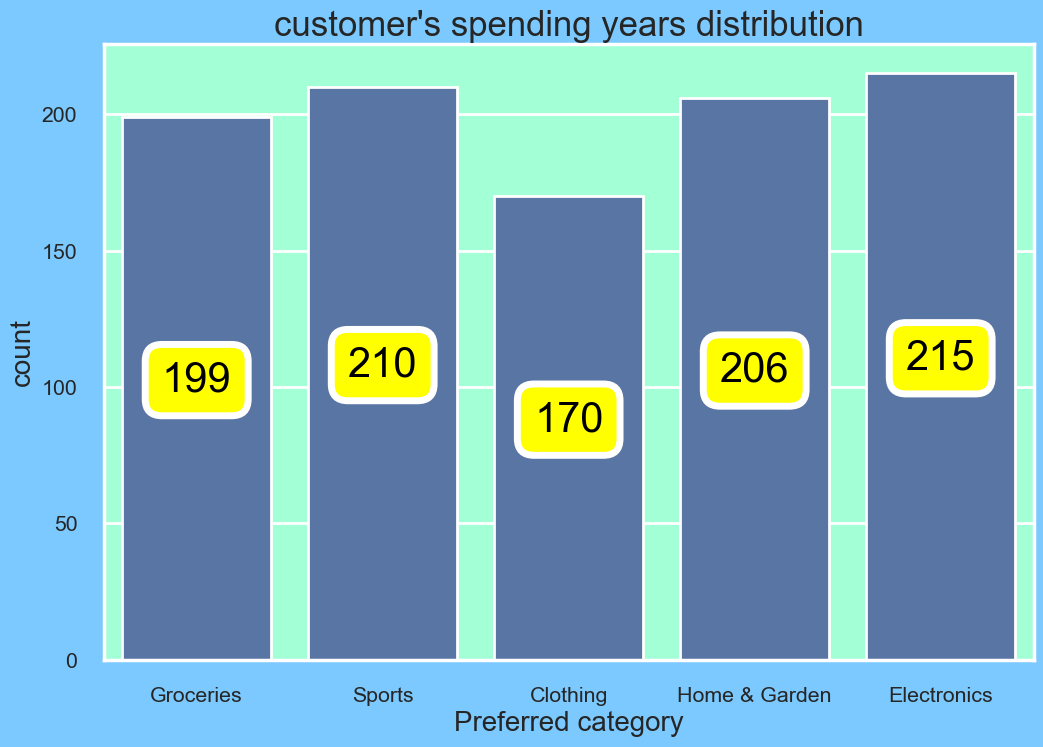

In [13]:
plt.figure(figsize=(12, 8))
p= sns.countplot(data=df, x='preferred_category')
plt.title('customer\'s spending years distribution', fontsize= 25)
plt.xlabel("Preferred category", fontsize= 20)
plt.ylabel('count', fontsize= 20)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=30,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "yellow", "edgecolor": "white", "linewidth" : 5, "alpha": 1})
plt.show()

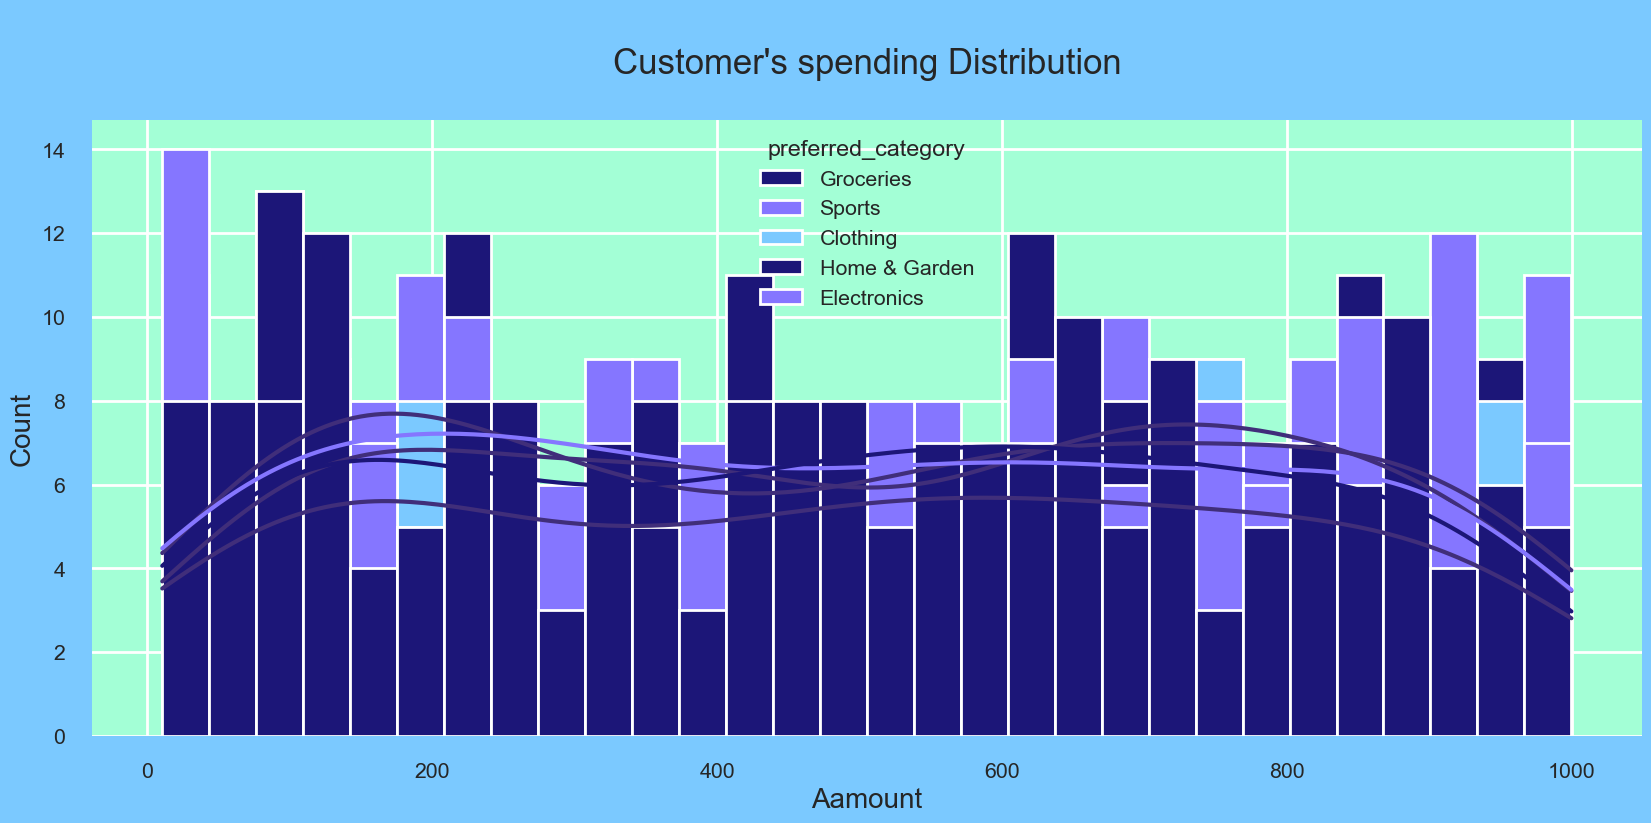

In [14]:
plt.figure(figsize=(20, 8))
p = sns.histplot(data=df, x='last_purchase_amount', palette=['#1C1678','#8576FF','#7BC9FF'], kde=True, edgecolor='white', bins=30, alpha=1, fill=True, hue= 'preferred_category')
p.axes.lines[0].set_color(palette[0])
p.axes.lines[1].set_color(palette[0])
p.axes.lines[2].set_color(palette[0])
p.axes.set_title("\nCustomer's spending Distribution\n",fontsize=25)
plt.xlabel('Aamount', fontsize=20)
plt.ylabel('Count', fontsize=20)
sns.despine(left=True, bottom=True)
plt.show()

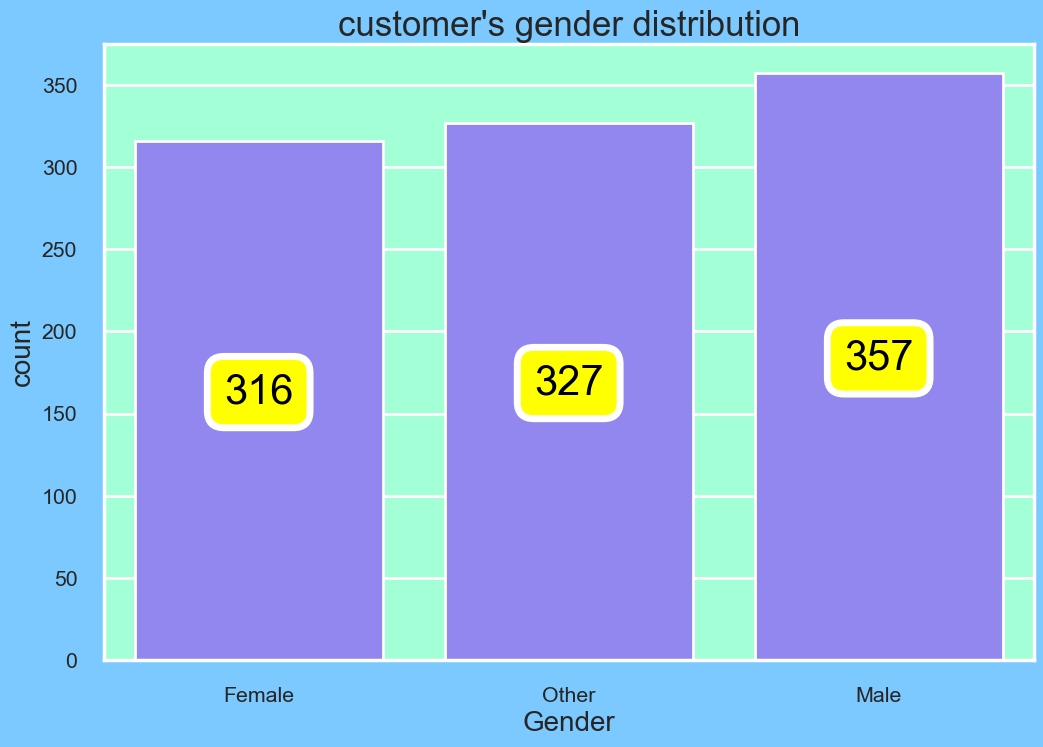

In [15]:
plt.figure(figsize=(12, 8))
p= sns.countplot(data=df, x='gender', color='#8576FF')
plt.title('customer\'s gender distribution', fontsize= 25)
plt.xlabel("Gender", fontsize= 20)
plt.ylabel('count', fontsize= 20)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=30,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "yellow", "edgecolor": "white", "linewidth" : 5, "alpha": 1})
plt.show()

<a id="1"></a>
# <p style="padding:10px;background-color:#A3FFD6;margin:0;color:#000000;font-family:courier;font-size:100%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:bold">Feature Engineering</p>

In [16]:
le = LabelEncoder()
df_Kmeans = df.copy()
for cols in columns:
    if df[cols].dtype == 'object':
        df_Kmeans[cols] = le.fit_transform(df[cols])

In [17]:
ss = StandardScaler()
df_Kmeans = ss.fit_transform(df_Kmeans)

<a id="1"></a>
# <p style="padding:10px;background-color:#A3FFD6;margin:0;color:#000000;font-family:courier;font-size:70%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:bold">Elbow method to find the optimal K value</p>

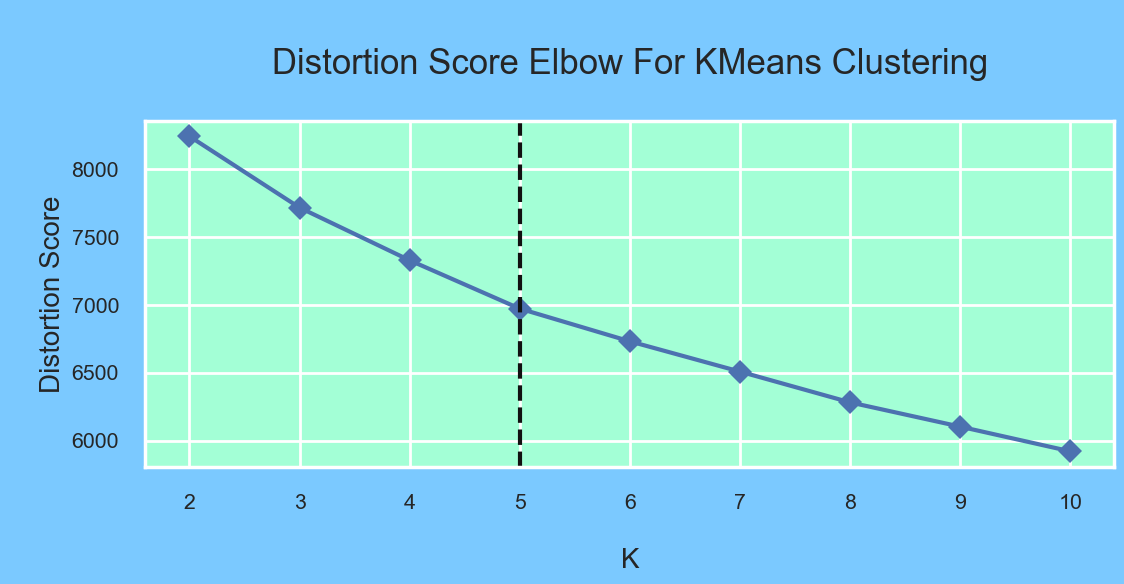

In [18]:
_, axes = plt.subplots(figsize=(12, 8))
elbow = KElbowVisualizer(KMeans(), k = 10, locate_elbow= True, timings= False, size= (1250, 450))
elbow.fit(df_Kmeans)
axes.set_title("\nDistortion Score Elbow For KMeans Clustering\n",fontsize=25)
axes.set_xlabel("\nK",fontsize=20)
axes.set_ylabel("\nDistortion Score",fontsize=20)
plt.show()

<a id="1"></a>
# <p style="padding:10px;background-color:#A3FFD6;margin:0;color:#000000;font-family:courier;font-size:100%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:bold">Model Training</p>

In [19]:
km = KMeans(n_clusters=5, random_state=42)
pred = km.fit_predict(df_Kmeans)
df['clusters'] = pred

<a id="1"></a>
# <p style="padding:10px;background-color:#A3FFD6;margin:0;color:#000000;font-family:courier;font-size:100%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:bold">Segmentating Customer</p>

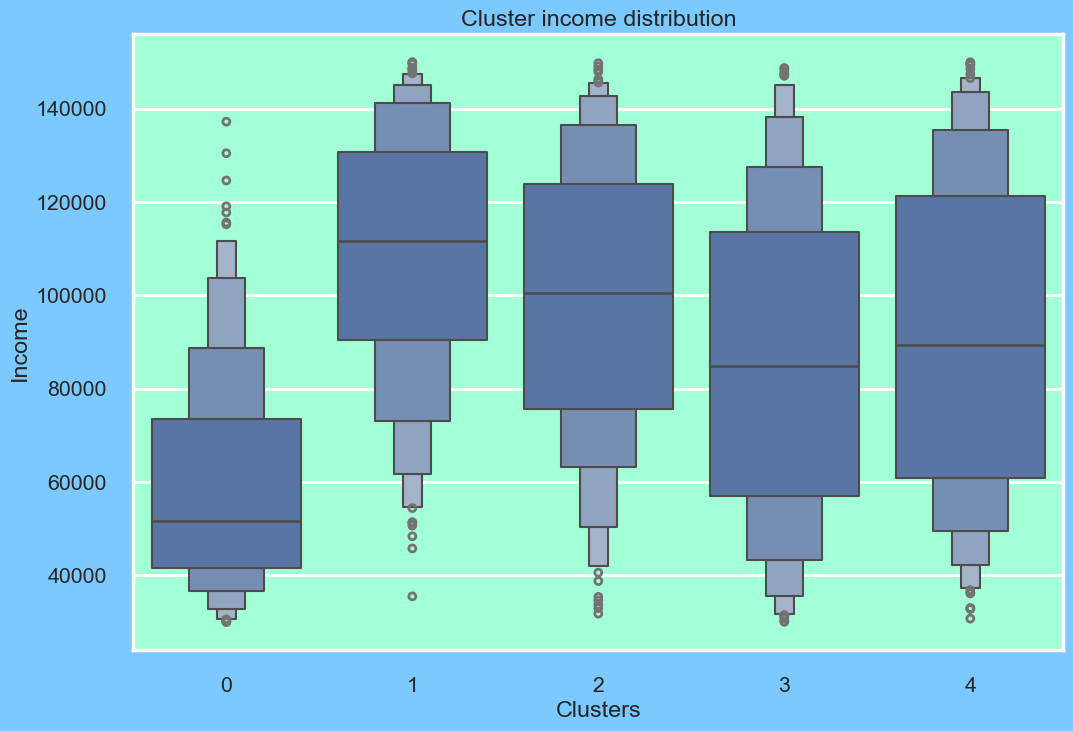

In [22]:
plt.figure(figsize=(12, 8))
sns.boxenplot(data=df, x='clusters', y = 'income')
plt.title('Cluster income distribution')
plt.xlabel('Clusters')
plt.ylabel('Income')

plt.show()

**Insights on Income**
* in cluster 0 people's income in the range of 40k to 100k
* in cluster 1 people's income in the range of 80k to 140k
* in cluster 2 people's income in the range of 60k to 130k
* in cluster 3 people's income in the range of 40k to 130k
* in cluster 4 people's income in the range of 45k to 140k

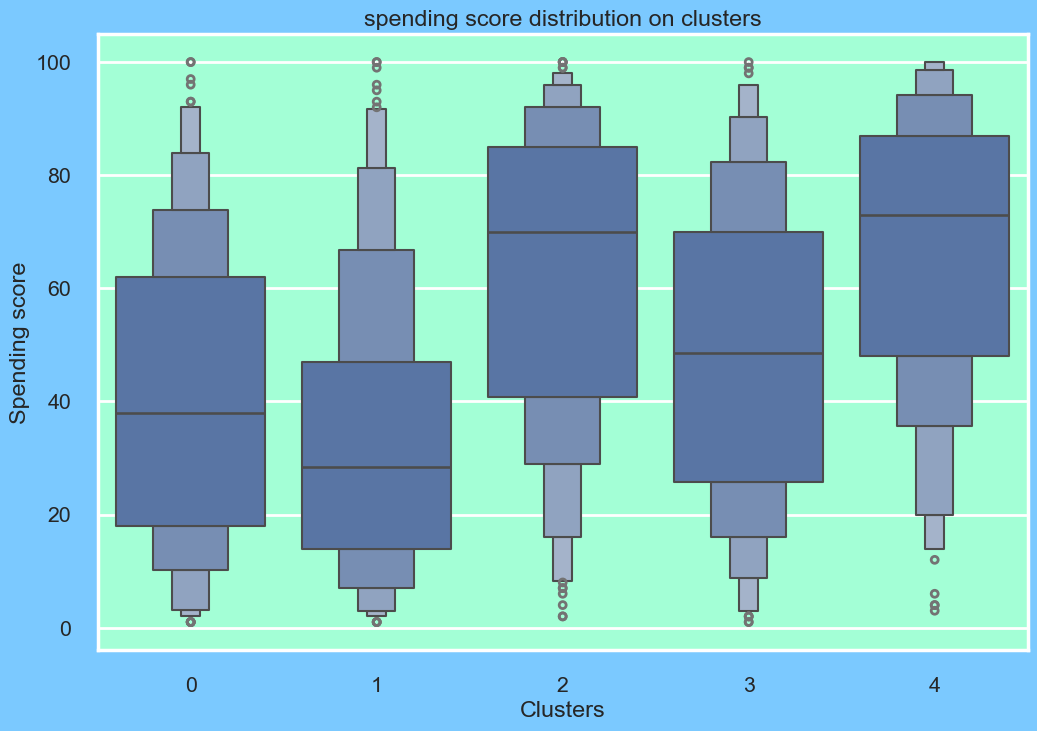

In [23]:
plt.figure(figsize=(12, 8))
sns.boxenplot(data=df, x='clusters', y = 'spending_score')
plt.title('spending score distribution on clusters')
plt.xlabel('Clusters')
plt.ylabel('Spending score')
plt.show()

**Insights on Spending Score**
* in cluster 0 people's Spending Score in the range of 10 to 70
* in cluster 1 people's Spending Score in the range of 10 to 85
* in cluster 2 people's Spending Score in the range of 19 to 80
* in cluster 3 people's Spending Score in the range of 15 to 85
* in cluster 4 people's Spending Score in the range of 20 to 100

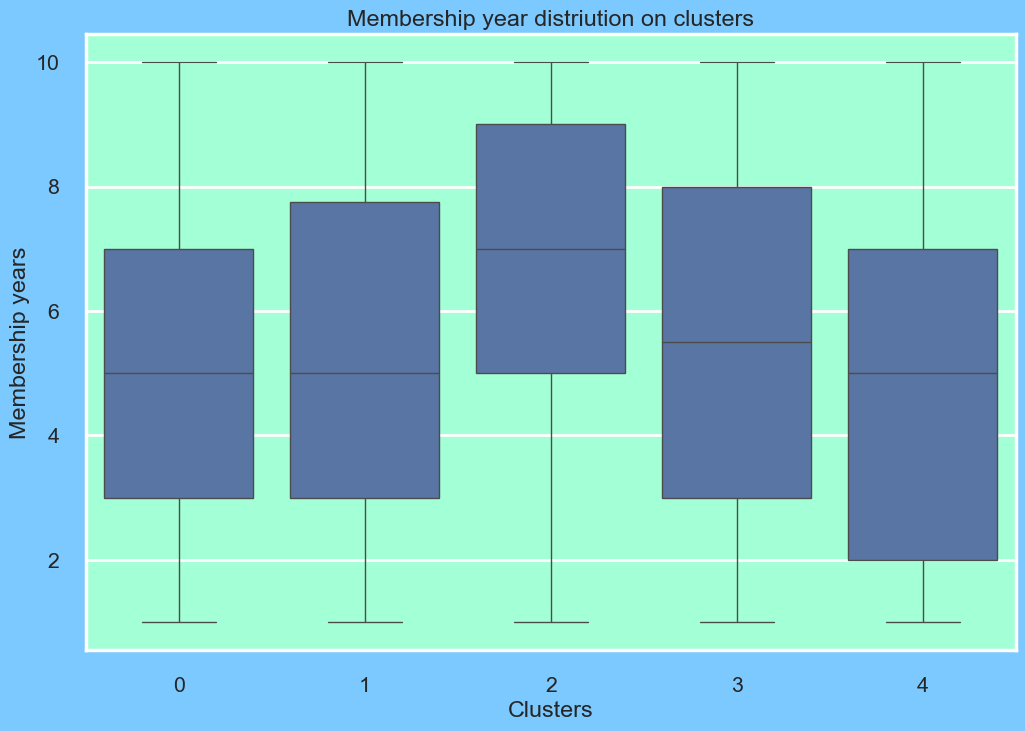

In [25]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='clusters', y = 'membership_years')
plt.title('Membership year distriution on clusters')
plt.xlabel('Clusters')
plt.ylabel('Membership years')
plt.show()

**Insights on Membership Years**
* in cluster 0 people's Membership Years in the range of 3 to 7
* in cluster 1 people's Membership Years in the range of 3 to 7.5
* in cluster 2 people's Membership Years in the range of 5 to 9
* in cluster 3 people's Membership Years in the range of 3 to 8
* in cluster 4 people's Membership Years in the range of 2 to 7

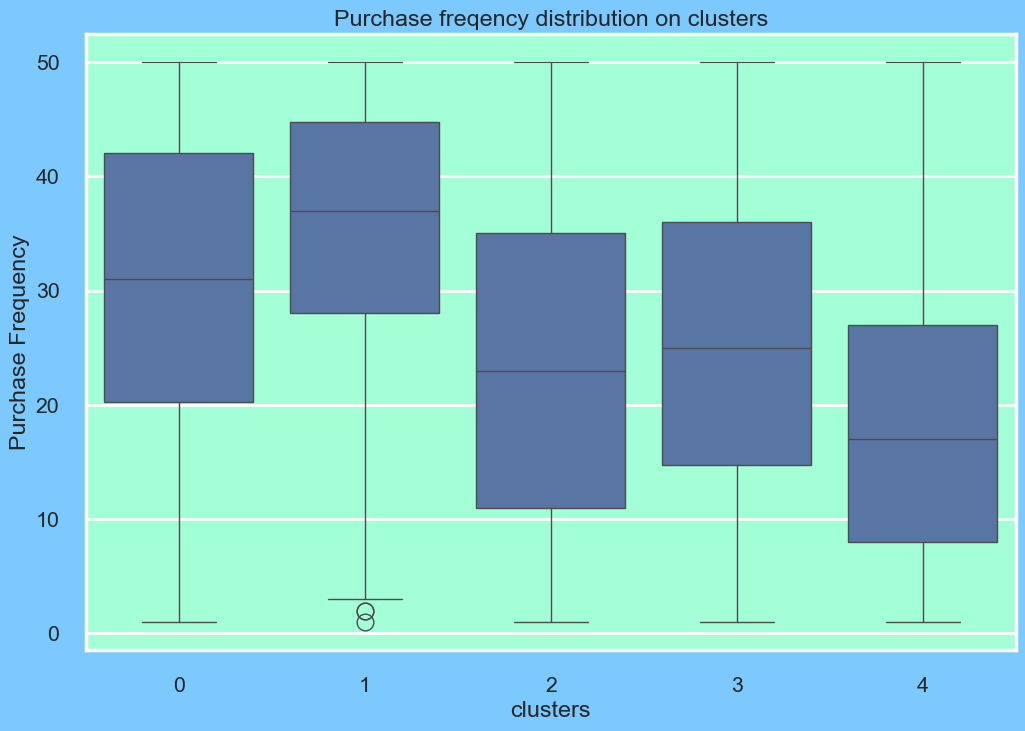

In [26]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='clusters', y = 'purchase_frequency')
plt.title('Purchase freqency distribution on clusters')
plt.xlabel("clusters")
plt.ylabel('Purchase Frequency')
plt.show()

**Insights on Purchase frequency**
* in cluster 0 people's Membership Years in the range of 20 to 41
* in cluster 1 people's Membership Years in the range of 28 to 45
* in cluster 2 people's Membership Years in the range of 11 to 35
* in cluster 3 people's Membership Years in the range of 15 to 36
* in cluster 4 people's Membership Years in the range of 9 to 29

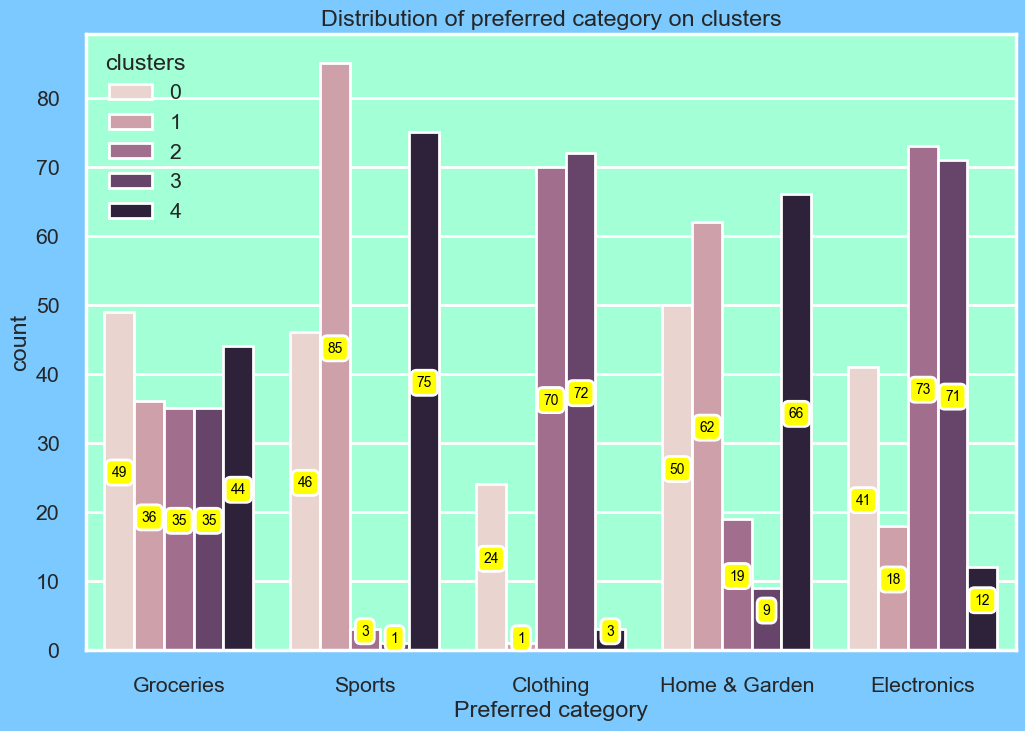

In [27]:
plt.figure(figsize=(12, 8))
p = sns.countplot(data=df, x='preferred_category', hue='clusters')
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=10,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "yellow", "edgecolor": "white", "linewidth" : 2, "alpha": 1})
plt.title('Distribution of preferred category on clusters')
plt.xlabel('Preferred category')
plt.show()

**Insights on product category**
* Groceries: Cluster 0 has the highest count (49), followed by clusters 1, 2, and 3 with similar counts (35-36).
* Sports: Cluster 1 dominates (85), with Cluster 4 also having a significant count (75).
* Clothing: Cluster 2 has the highest count (72), closely followed by Cluster 3 (70).
* Home & Garden: Cluster 0 leads (62), followed by Cluster 4 (66).
* Electronics: Cluster 4 and Cluster 1 have almost equal high counts (71-73), with Cluster 0 also notable (62).


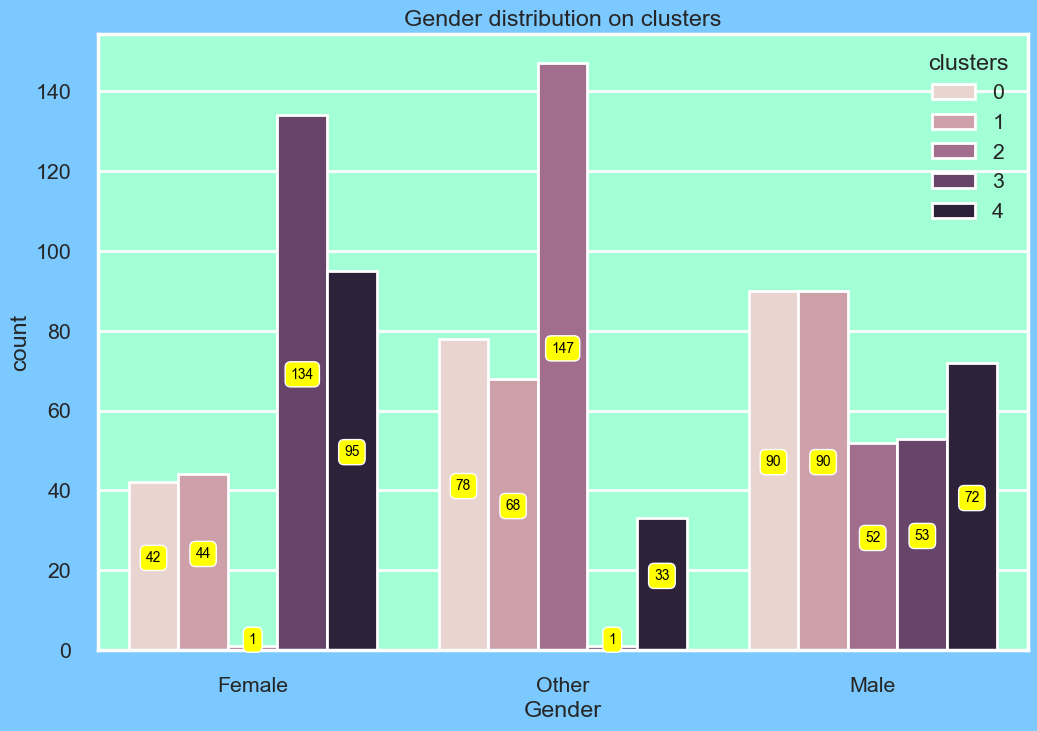

In [28]:
plt.figure(figsize=(12, 8))
p = sns.countplot(data=df, x='gender', hue='clusters')
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=10,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "yellow", "edgecolor": "white", "linewidth" : 1, "alpha": 1})
plt.title("Gender distribution on clusters")
plt.xlabel("Gender")
plt.show()

**Insights on gender**
* **Male:** Cluster 3 have highest male count (134) followed by cluster 4 (95) and followed by cluster 1, 0, 2
* **Female:** Cluster 0 and 1  have highest male count (90) followed by cluster 4 (72) and followed by cluster 2, 3
* **Other Genderr:** Cluster 2 have highest male count (147) followed by cluster 0 (95) and followed by cluster 1, 4, 3


<a id="1"></a>
# <p style="padding:10px;background-color:#A3FFD6;margin:0;color:#000000;font-family:courier;font-size:100%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:500">Conclusion and Results</p>

<h2 style="padding:10px;background-color:#A3FFD6;color:#000000;font-family:courier;font-size:100%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:bold;">
  cluster 0
</h2>

<ul style="list-style: disc inside;padding:10px;background-color:#A3FFD6;color:#000000;font-family:courier;font-size:100%;text-align:left;border-radius: 10px 0px;overflow:hidden;font-weight:1000;">
  <li style="padding:10px;margin:10px 0;">in cluster 0 people's income in the range of 40k to 100k</li>
  <li style="padding:10px;margin:10px 0;">in cluster 0 people's Spending Score in the range of 10 to 70</li>
  <li style="padding:10px;margin:10px 0;">in cluster 0 people's Membership Years in the range of 3 to 7</li>
  <li style="padding:10px;margin:10px 0;">in cluster 0 people's purchase freqency in the range of 20 to 41</li>
  <li style="padding:10px;margin:10px 0;">Home & garden and groceries are the proferred category for the cluster 0</li>
  <li style="padding:10px;margin:10px 0;">More number of male are in the cluster 0 and followed by other gender</li>
</ul>


<h2 style="padding:10px;background-color:#A3FFD6;color:#000000;font-family:courier;font-size:100%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:bold;">
  cluster 1
</h2>

<ul style="list-style: disc inside;padding:10px;background-color:#A3FFD6;color:#000000;font-family:courier;font-size:100%;text-align:left;border-radius: 10px 0px;overflow:hidden;font-weight:1000;">
  <li style="padding:10px;margin:10px 0;">in cluster 1 people's income in the range of 80k to 140k</li>
  <li style="padding:10px;margin:10px 0;">in cluster 1 people's Spending Score in the range of 10 to 85</li>
  <li style="padding:10px;margin:10px 0;">in cluster 1 people's Membership Years in the range of 3 to 7.5</li>
  <li style="padding:10px;margin:10px 0;">in cluster 1 people's purchase freqency in the range of 28 to 45</li>
  <li style="padding:10px;margin:10px 0;">Sports and Home & Garden are the proferred category for the cluster 1</li>
  <li style="padding:10px;margin:10px 0;">More number of male are in the cluster 1 and followed by other gender</li>
</ul>


<h2 style="padding:10px;background-color:#A3FFD6;color:#000000;font-family:courier;font-size:100%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:bold;">
  cluster 2
</h2>

<ul style="list-style: disc inside;padding:10px;background-color:#A3FFD6;color:#000000;font-family:courier;font-size:100%;text-align:left;border-radius: 10px 0px;overflow:hidden;font-weight:1000;">
  <li style="padding:10px;margin:10px 0;">in cluster 2 people's income in the range of 60k to 130k</li>
  <li style="padding:10px;margin:10px 0;">in cluster 2 people's Spending Score in the range of 19 to 80</li>
  <li style="padding:10px;margin:10px 0;">in cluster 2 people's Membership Years in the range of 5 to 9</li>
  <li style="padding:10px;margin:10px 0;">in cluster 2 people's purchase freqency in the range of 11 to 35</li>
  <li style="padding:10px;margin:10px 0;">Electronics and clothing are the proferred category for the cluster 2</li>
  <li style="padding:10px;margin:10px 0;">More number of male are in the cluster 2 and followed by other gender</li>
</ul>


<h2 style="padding:10px;background-color:#A3FFD6;color:#000000;font-family:courier;font-size:100%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:bold;">
  cluster 2
</h2>

<ul style="list-style: disc inside;padding:10px;background-color:#A3FFD6;color:#000000;font-family:courier;font-size:100%;text-align:left;border-radius: 10px 0px;overflow:hidden;font-weight:1000;">
  <li style="padding:10px;margin:10px 0;">in cluster 3 people's income in the range of 40k to 130k</li>
  <li style="padding:10px;margin:10px 0;">in cluster 3 people's Spending Score in the range of 15 to 85</li>
  <li style="padding:10px;margin:10px 0;">in cluster 3 people's Membership Years in the range of 3 to 8</li>
  <li style="padding:10px;margin:10px 0;">in cluster 3 people's purchase freqency in the range of 15 to 36</li>
  <li style="padding:10px;margin:10px 0;">Electronics and clothing are the proferred category for the cluster 3</li>
  <li style="padding:10px;margin:10px 0;">More number of Female  are in the cluster 3 and followed by other gender</li>
</ul>

<h2 style="padding:10px;background-color:#A3FFD6;color:#000000;font-family:courier;font-size:100%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:bold;">
  cluster 2
</h2>

<ul style="list-style: disc inside;padding:10px;background-color:#A3FFD6;color:#000000;font-family:courier;font-size:100%;text-align:left;border-radius: 10px 0px;overflow:hidden;font-weight:1000;">
  <li style="padding:10px;margin:10px 0;">in cluster 4 people's income in the range of 45k to 140k</li>
  <li style="padding:10px;margin:10px 0;">in cluster 4 people's Spending Score in the range of 20 to 100</li>
  <li style="padding:10px;margin:10px 0;">in cluster 4 people's Membership Years in the range of 2 to 7</li>
  <li style="padding:10px;margin:10px 0;">in cluster 4 people's purchase freqency in the range of 9 to 29</li>
  <li style="padding:10px;margin:10px 0;">Sports and Home & Garden are the proferred category for the cluster 4</li>
  <li style="padding:10px;margin:10px 0;">More number of Female  are in the cluster 4 and followed by Male</li>
</ul>